
#The Sparks Foundation

Computer vision and internet of thing

***Task4: Detection of face mask***

*****By Nada Boulares*****

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, Flatten, Dense, MaxPool2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from config import *

In [10]:
!unzip /content/drive/MyDrive/test.zip

Archive:  /content/drive/MyDrive/test.zip
   creating: test/
   creating: test/with_mask/
  inflating: test/with_mask/1-with-mask.jpg  
  inflating: test/with_mask/106-with-mask.jpg  
  inflating: test/with_mask/11-with-mask.jpg  
  inflating: test/with_mask/110-with-mask.jpg  
  inflating: test/with_mask/111-with-mask.jpg  
  inflating: test/with_mask/114-with-mask.jpg  
  inflating: test/with_mask/121-with-mask.jpg  
  inflating: test/with_mask/127-with-mask.jpg  
  inflating: test/with_mask/141-with-mask.jpg  
  inflating: test/with_mask/146-with-mask.jpg  
  inflating: test/with_mask/157-with-mask.jpg  
  inflating: test/with_mask/160-with-mask.jpg  
  inflating: test/with_mask/165-with-mask.jpg  
  inflating: test/with_mask/167-with-mask.jpg  
  inflating: test/with_mask/174-with-mask.jpg  
  inflating: test/with_mask/181-with-mask.jpg  
  inflating: test/with_mask/184-with-mask.jpg  
  inflating: test/with_mask/186-with-mask.jpg  
  inflating: test/with_mask/193-with-mask.jpg  
 

In [11]:
!unzip /content/drive/MyDrive/train.zip

Archive:  /content/drive/MyDrive/train.zip
   creating: train/
   creating: train/with_mask/
  inflating: train/with_mask/-110603108-gettyimages-533567012.jpg  
  inflating: train/with_mask/-110695084-mask2.jpg  
  inflating: train/with_mask/0-with-mask.jpg  
  inflating: train/with_mask/0000305-62360-halyard-health-pfr-p3-respirator-face-mask-ffp.jpeg  
  inflating: train/with_mask/0000444-48296-halyard-health-surgical-mask-teddy-bear-print.jpeg  
  inflating: train/with_mask/007563.jpg  
  inflating: train/with_mask/0779db20580fc7b054ad6b1b7bd9fb35.jpeg  
  inflating: train/with_mask/1-respirator-mask.jpg  
  inflating: train/with_mask/10-with-mask.jpg  
  inflating: train/with_mask/100-with-mask.jpg  
  inflating: train/with_mask/101-with-mask.jpg  
  inflating: train/with_mask/103-with-mask.jpg  
  inflating: train/with_mask/104-with-mask.jpg  
  inflating: train/with_mask/105-with-mask.jpg  
  inflating: train/with_mask/106.jpg  
  inflating: train/with_mask/107-with-mask.jpg  
  

In [20]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [2]:
%%writefile config.py

batch_size = 32
epochs = 5
lr = 0.0001
width = height = 128

Writing config.py


In [12]:
data_generator = ImageDataGenerator(
    rescale = 1/.255,
    horizontal_flip=True
)

train_data = data_generator.flow_from_directory(
    "/content/train",
    target_size = (width, height),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = True,
)

val_data = data_generator.flow_from_directory(
    "/content/test",
    target_size = (width, height),
    batch_size = batch_size,
    class_mode = 'categorical',
    shuffle = True,
)

print(np.bincount(train_data.labels))
print(np.bincount(val_data.labels))

Found 1315 images belonging to 2 classes.
Found 194 images belonging to 2 classes.
[658 657]
[97 97]


In [13]:
model = tf.keras.models.Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 3)),
        Conv2D(32, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPool2D(),
        Conv2D(64, (3, 3), activation='relu'),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPool2D(),
        Conv2D(128, (3, 3), activation='relu'),
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPool2D(),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(2, activation='softmax')
])

In [14]:
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                             metrics=['accuracy'])

In [23]:
model.fit(train_data,
          steps_per_epoch=train_data.samples/batch_size,
          validation_data=val_data,
          validation_steps=val_data.samples/batch_size,
          batch_size=batch_size,
          epochs=epochs,
          )

Epoch 1/5
41/41 [==============================] - 9s 209ms/step - loss: 0.0168 - accuracy: 0.9932 - val_loss: 0.1071 - val_accuracy: 0.9639
Epoch 2/5
41/41 [==============================] - 8s 187ms/step - loss: 0.0062 - accuracy: 0.9977 - val_loss: 0.1242 - val_accuracy: 0.9536
Epoch 3/5
41/41 [==============================] - 8s 191ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.1029 - val_accuracy: 0.9639
Epoch 4/5
41/41 [==============================] - 8s 188ms/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 0.1099 - val_accuracy: 0.9536
Epoch 5/5
41/41 [==============================] - 8s 191ms/step - loss: 0.0046 - accuracy: 0.9985 - val_loss: 0.1348 - val_accuracy: 0.9536


In [23]:
model.save("/content/drive/MyDrive/model2.h5")

In [17]:
test_data_path = '/content/test'
model = load_model('/content/drive/MyDrive/model2.h5')

data_generator = ImageDataGenerator(rescale = 1/.255)

test_data = data_generator.flow_from_directory(
    "/content/test",
    target_size = (width, height),
    batch_size=batch_size,
    class_mode = 'categorical',
    shuffle = False,
)

model.evaluate(test_data)

Found 194 images belonging to 2 classes.
7/7 [==============================] - 1s 83ms/step - loss: 0.1207 - accuracy: 0.9536


[0.12068609148263931, 0.9536082744598389]

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis = 1)
print('confusion Matrix')
print(confusion_matrix(test_data.classes, y_pred))

target_names = list(test_data.class_indices.keys())
print('Classification Report')
print(classification_report(test_data.classes, y_pred, target_names=target_names))

confusion Matrix
[[92  5]
 [ 4 93]]
Classification Report
              precision    recall  f1-score   support

   with_mask       0.96      0.95      0.95        97
without_mask       0.95      0.96      0.95        97

    accuracy                           0.95       194
   macro avg       0.95      0.95      0.95       194
weighted avg       0.95      0.95      0.95       194



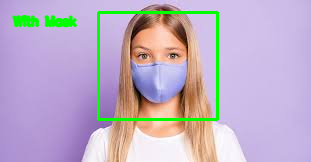

With Mask


In [22]:
import cv2
import os
import numpy as np
from config import *
from keras.models import load_model
from FaceAlignment.align_image import main
import argparse
from google.colab.patches import cv2_imshow

def get_optimal_font_scale(text, width):

    for scale in reversed(range(0, 60, 1)):
        textSize = cv2.getTextSize(text, fontFace=cv2.FONT_HERSHEY_DUPLEX, fontScale=scale/10, thickness=1)
        new_width = textSize[0][0]
        if (new_width <= width):
            return scale/10
    return 1



model = load_model("/content/drive/MyDrive/model2.h5")


img = cv2.imread("/content/drive/MyDrive/im.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
face_BB = main(img)


try:
    face, BB = next(face_BB)
    face_img = cv2.resize(face, (width, height))
    face_img = face_img / 255.0
    face_img = face_img.reshape(1, width, height, 3)

    y_pred = model.predict(face_img)
    prediction = np.argmax(y_pred)

    if prediction == 1:
      y_pred = "With Mask"
     
    else:
      y_pred = "Without Mask"

    BB = np.array(BB)
    font_size = get_optimal_font_scale(y_pred, img_rgb.shape[1] // 4)
    cv2.rectangle(img, pt1=(BB[0], BB[1]), pt2=(BB[2], BB[3]), color=(0, 255, 0),thickness=2)
    cv2.putText(img, y_pred, (img_rgb.shape[0] // 12, img_rgb.shape[1] // 12), cv2.FONT_HERSHEY_SIMPLEX, font_size, (0, 255, 0), 2,
                    cv2.LINE_AA)

except:
    y_pred = 'Face not Detected'
    font_size = get_optimal_font_scale(y_pred, img_rgb.shape[1] // 4)
    cv2.putText(img, y_pred, (img_rgb.shape[0] // 12, img_rgb.shape[1] // 12), cv2.FONT_HERSHEY_SIMPLEX, font_size, (0, 255, 0), 2,
                    cv2.LINE_AA)


cv2_imshow(img)
cv2.imwrite(os.path.join('output/{im}'+ '.jpg'), img)
cv2.waitKey()
print (y_pred)